 <h1 style=" font-family:calibri; color:black; font-size:250%; text-align:center; ">Customer Segmentation / Clustering</h1>

<div style="border-radius:10px; padding: 5px; background-color: grey; font-size:120%; text-align:left">

<h3 align="left"><font color=black>Problem Statement:</font></h3>

Customer segmentation using clustering techniques using both profile information
(from Customers.csv) and transaction information (from Transactions.csv).

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [9]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [11]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [41]:
# Derive TotalSpending
merged_data = pd.merge(transactions, customers, on="CustomerID")
total_spending = merged_data.groupby("CustomerID")["TotalValue"].sum().reset_index()
total_spending.columns = ["CustomerID", "TotalSpending"]
customers = pd.merge(customers, total_spending, on="CustomerID", how="left")

In [45]:
# Ensure TotalSpending is filled with 0 if missing
customers["TotalSpending"] = customers["TotalSpending"].fillna(0)

In [49]:
# Derive CustomerTenure
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
today = pd.Timestamp.today()
customers["CustomerTenure"] = (today - customers["SignupDate"]).dt.days

In [51]:
# Standardize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customers[["TotalSpending", "CustomerTenure"]])

In [53]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
customers["Cluster"] = kmeans.fit_predict(scaled_data)

C:\Users\sreey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customers["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.7947787492099435


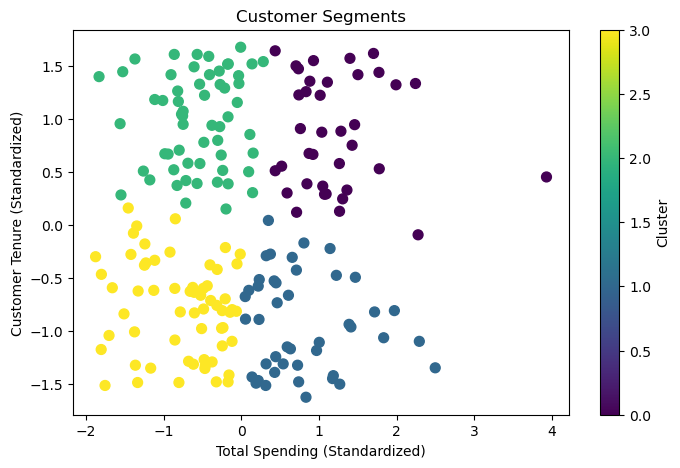

In [73]:
# Visualize Clusters
plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    scaled_data[:, 0],
    scaled_data[:, 1],
    c=customers["Cluster"],  # Color by cluster
    cmap="viridis",
    s=50
)
# Add title and axis labels
plt.title("Customer Segments")
plt.xlabel("Total Spending (Standardized)")
plt.ylabel("Customer Tenure (Standardized)")
# Add a color bar to indicate cluster labels
plt.colorbar(scatter, label="Cluster")

# Display the plot
plt.show()